In [1]:
# Regression

# OLS based linear regression
# Gradient Descent based Linear Regression
# Logistic regression

# WHats the common theme?

'''
Parametric Optimization

To figure out coefficients/ weights and intercept

'''

'\nParametric Optimization\n\nTo figure out coefficients/ weights and intercept\n\n'

In [2]:
'''
we assume linear model
y_pred = w.x + b

We can also say that basically we try  to map the data using hyperplane 

'''

'''
Pros:
1. Simple algorithmic design and easy interpretability
2. Fast to train model
3. Light model
4. Relationship of independent and dependent variables can be explained easily


Cons:
1. Impacted by outliers
2. It cant directly handle the non -linear data
3. Multicollinearity can adversly impact our outcome
4. Noise in the features

'''

'\nPros:\n1. Simple algorithmic design and easy interpretability\n2. Fast to train model\n3. Light model\n4. Relationship of independent and dependent variables can be explained easily\n\n\nCons:\n1. Impacted by outliers\n2. It cant directly handle the non -linear data\n3. Multicollinearity can adversly impact our outcome\n4. Noise in the features\n\n'

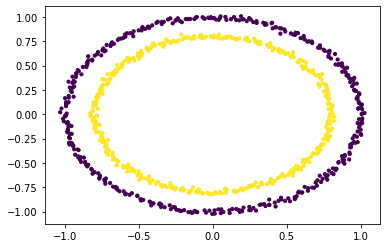

In [3]:
# How to do polynomial regression using sklearn
# there is no functions named polynomial regression in sklearn

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, Y = make_circles(n_samples = 800, noise = 0.015)
plt.scatter(X[:,0], X[:,1], c = Y, s = 10)
plt.show()


In [4]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree = 2)

X_tf = pol.fit_transform(X)
print(X_tf)

[[ 1.          0.94533551 -0.24765986  0.89365923 -0.23412166  0.06133541]
 [ 1.          0.80946967  0.09045822  0.65524115  0.07322319  0.00818269]
 [ 1.          0.51015242 -0.86332917  0.26025549 -0.44042947  0.74533726]
 ...
 [ 1.         -0.43555878  0.65242242  0.18971145 -0.28416831  0.42565502]
 [ 1.          0.15179639 -0.79603149  0.02304214 -0.12083471  0.63366613]
 [ 1.          0.56961278 -0.56662456  0.32445872 -0.3227566   0.3210634 ]]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X_tf,Y)

lr = LogisticRegression(fit_intercept = False)
lr.fit(x_train, y_train)

LogisticRegression(fit_intercept=False)

In [6]:
lr.score(x_test, y_test)

1.0

In [7]:
lr.coef_

array([[ 6.37489229, -0.01819614, -0.01522757, -7.77106229, -0.10691466,
        -7.89367108]])

In [8]:
lr.intercept_

array([0.])

In [9]:
X_tf[1]

array([1.        , 0.80946967, 0.09045822, 0.65524115, 0.07322319,
       0.00818269])

In [10]:
import numpy as np

In [11]:
1/(1+np.power(np.e, -(np.dot(lr.coef_,X_tf[1]))))

array([0.76753524])

In [12]:
Y[1]

1

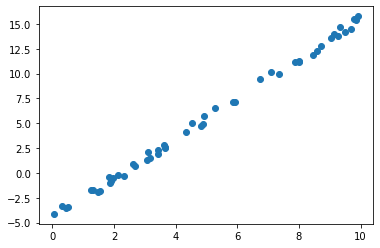

In [13]:
# A polynomial regression example

rng = np.random.RandomState(70)

x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y)

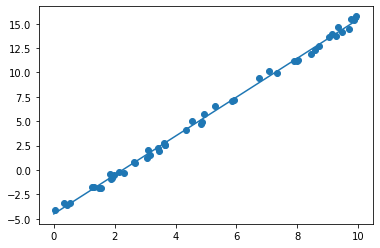

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0,10,1000)

yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [15]:
model.coef_

array([1.99592587])

In [16]:
model.intercept_

-4.50780386261955

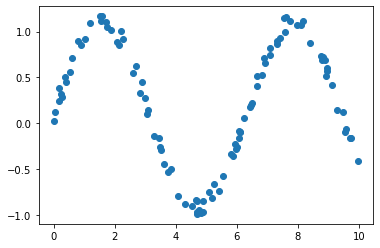

In [17]:
x = 10 * rng.rand(100)
y = np.sin(x) + 0.2 * rng.rand(100)
plt.scatter(x,y)

(-2.0, 2.0)

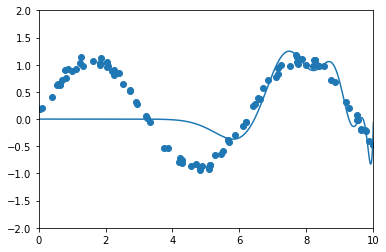

In [18]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(27), LinearRegression(fit_intercept=False))

x = 10 * rng.rand(100)
y = np.sin(x) + 0.2 * rng.rand(100)
poly_model.fit(x[:,np.newaxis], y)

xfit = np.linspace(0,10,1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlim(0,10)
plt.ylim(-2,2)

In [19]:
poly_model.steps[1]

('linearregression', LinearRegression(fit_intercept=False))

In [20]:
poly_model[1].coef_

array([-1.30711631e-14,  2.62900363e-14,  1.16372513e-16, -2.49009806e-19,
       -3.02703131e-21, -6.52702083e-21, -3.05575471e-20, -1.43261753e-19,
       -6.67484870e-19, -3.06975002e-18, -1.38438824e-17, -6.07901738e-17,
       -2.57789075e-16, -1.04512458e-15, -3.99829504e-15, -1.41796146e-14,
       -4.54327723e-14, -1.26325401e-13, -2.83849391e-13, -4.40549781e-13,
       -2.50513386e-13,  4.13201804e-13, -1.70225933e-13,  3.54335422e-14,
       -4.26643974e-15,  3.02402408e-16, -1.17677074e-17,  1.94643492e-19])

(-2.0, 2.0)

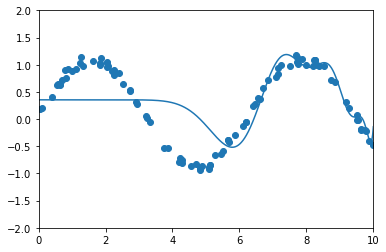

In [21]:
# L2 penalty - ridge regression
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(27), Ridge(alpha = 0.05))

model.fit(x[:,np.newaxis], y)

plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0,10)
plt.ylim(-2,2)

In [22]:
model[1].coef_

array([ 4.49664998e-12,  1.28704986e-12,  1.86393423e-11,  1.10147827e-12,
       -5.05667117e-12, -8.97616652e-13, -1.02488989e-12, -1.50195100e-12,
       -2.20315180e-12, -3.80224939e-12, -4.51868773e-12, -5.40036229e-12,
       -4.12796374e-12, -3.28817796e-12, -4.39124142e-12, -9.60633465e-12,
       -1.49349042e-11, -1.36352365e-11, -1.07145041e-11,  4.39069520e-12,
        4.27771114e-12, -3.01674466e-12,  8.43521407e-13, -1.32790996e-13,
        1.27587962e-14, -7.45937721e-16,  2.44933869e-17, -3.47568028e-19])

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.595119102606541, tolerance: 0.004581926774854598
  model = cd_fast.enet_coordinate_descent(


(-2.0, 2.0)

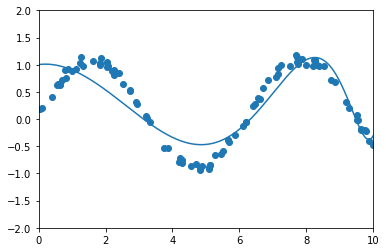

In [23]:
# L1 penalty - lasso regression

from sklearn.linear_model import Lasso

model = make_pipeline(PolynomialFeatures(27), Lasso(alpha = 0.001))

model.fit(x[:,np.newaxis], y)

plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0,10)
plt.ylim(-2,2)

In [24]:
model[1].coef_

array([ 0.00000000e+00,  7.95450328e-02, -1.98817067e-01,  1.87418301e-02,
        1.23576673e-03,  2.97552435e-05, -2.44850251e-06, -4.52656665e-07,
       -4.70411643e-08, -4.01394686e-09, -3.04077959e-10, -2.07459082e-11,
       -1.23887166e-12, -5.71072011e-14, -6.78995352e-16,  2.90741593e-16,
        5.29800138e-17,  6.73543691e-18,  7.43324434e-19,  7.56964245e-20,
        7.28879185e-21,  6.70496945e-22,  5.90750441e-23,  4.96549666e-24,
        3.93193733e-25,  2.84713919e-26,  1.74151381e-27,  6.37781511e-29])

In [25]:
# Impact of Outliers

ridge = Ridge(alpha=0.1)
lr = LinearRegression()

ridge.fit([[0,0],[1,1],[2,2],[3,3.4]], [0, 1 ,1 , 3.3])
lr.fit([[0,0],[1,1],[2,2],[3,3.4]], [0, 1 ,1 , 3.3])


LinearRegression()

In [26]:
ridge.coef_

array([-0.26410999,  1.12445731])

In [27]:
lr.coef_

array([-3.58333333,  4.08333333])

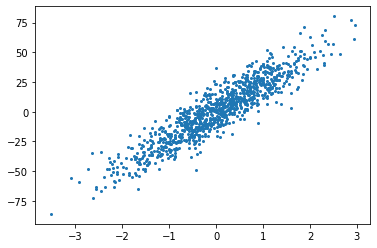

In [28]:
from sklearn.datasets import make_regression

X,Y = make_regression(n_features=1, noise=10, n_samples = 1000)
plt.scatter(X,Y, s=4)
plt.show()

In [29]:
lr = LinearRegression(fit_intercept=True)

lr.fit(X,Y)

LinearRegression()

In [30]:
lr.coef_

array([23.11522251])

In [31]:
lr.intercept_

0.6465907265998186

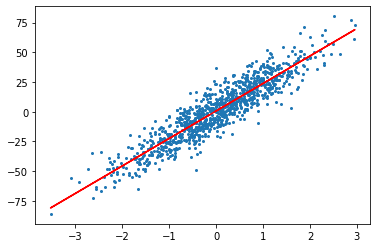

In [32]:
pred = lr.predict(X)
plt.scatter(X,Y, s=4, label ='Training')
plt.plot(X, pred, c='r',label = 'Model')
plt.show()

In [33]:
outliers = Y[950:] - 600

Y_out = np.append(Y[:950], outliers)

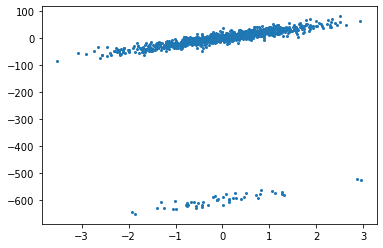

In [34]:
plt.scatter(X,Y_out, s =4)

In [35]:
lr = LinearRegression()
lr.fit(X,Y_out)

pred_out = lr.predict(X)

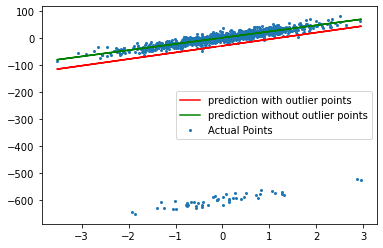

In [36]:
plt.scatter(X,Y_out, s =4, label = "Actual Points")
plt.plot(X,pred_out,c='r',label = 'prediction with outlier points')
plt.plot(X,pred,c = 'g',label = 'prediction without outlier points')
plt.legend()
plt.show()

In [37]:
lr.coef_

array([24.54959965])

In [38]:
lr.intercept_

-29.362242276532058

In [39]:
ridge = Ridge(alpha=50)
ridge.fit(X,Y_out)

pred_ridge = ridge.predict(X)

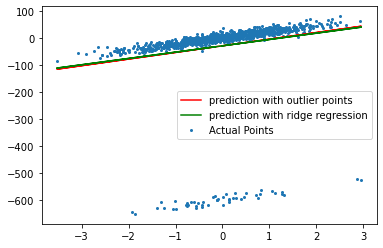

In [40]:
plt.scatter(X,Y_out, s =4, label = "Actual Points")
plt.plot(X,pred_out,c='r',label = 'prediction with outlier points')
plt.plot(X,pred_ridge,c = 'g',label = 'prediction with ridge regression')
plt.legend()
plt.show()

In [41]:
ridge.coef_

array([23.41124594])

In [42]:
ridge.intercept_

-29.3552322081088

In [43]:
# Effect of Alpha on coefficients

X, y, w = make_regression(n_samples=10, n_features=10, coef =True, random_state=7, bias = 3.5)
print(X)
print("\n \n",y)
print("\n \n",w)

[[-4.16474319e-01  1.04939655e+00 -2.28831510e+00 -4.53860299e-02
  -4.05227855e-01  1.65069969e+00 -3.87139943e-01  2.02907222e+00
  -1.45067870e+00  1.54335535e-01]
 [-5.24604619e-01  2.69411631e-01  2.24759505e+00 -1.70833920e+00
   3.83121852e-01  8.40733242e-01  5.68061887e-01 -7.52837196e-01
  -1.80309866e+00 -1.79986401e-01]
 [-3.29413752e-01  1.76616088e+00  1.46197563e+00 -2.06441480e+00
  -1.20421985e+00 -7.42553525e-01 -1.65107559e+00  5.35429356e-01
  -6.62159340e-01  1.07247013e+00]
 [ 6.69418193e-01  1.52957963e+00  1.29688519e+00 -1.96027312e-01
  -2.99711237e-01  6.54705704e-01  4.15502614e-01 -9.23544657e-01
  -5.90769819e-01  8.94352305e-01]
 [-4.71926652e-01 -3.42117023e-01  8.69039329e-01 -6.73645187e-01
   2.25994699e+00  5.48745120e-01 -1.22421866e-02 -7.56634615e-02
  -5.58674501e-02  6.76628990e-01]
 [ 6.00498516e-01  1.01765801e+00 -1.75472431e+00 -7.88923029e-01
  -8.90385858e-04  1.69052570e+00  3.28201637e-02  4.07516283e-01
   2.06557291e-03 -4.65937371e-01

In [44]:
alphas = np.logspace(-6,6,100)
alphas

array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2.00923300e-04,
       2.65608778e-04, 3.51119173e-04, 4.64158883e-04, 6.13590727e-04,
       8.11130831e-04, 1.07226722e-03, 1.41747416e-03, 1.87381742e-03,
       2.47707636e-03, 3.27454916e-03, 4.32876128e-03, 5.72236766e-03,
       7.56463328e-03, 1.00000000e-02, 1.32194115e-02, 1.74752840e-02,
       2.31012970e-02, 3.05385551e-02, 4.03701726e-02, 5.33669923e-02,
       7.05480231e-02, 9.32603347e-02, 1.23284674e-01, 1.62975083e-01,
       2.15443469e-01, 2.84803587e-01, 3.76493581e-01, 4.97702356e-01,
       6.57933225e-01, 8.69749003e-01, 1.14975700e+00, 1.51991108e+00,
       2.00923300e+00, 2.65608778e+00, 3.51119173e+00, 4.64158883e+00,
      

In [45]:
coefs_list = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coefs_list.append(ridge.coef_)
    

In [46]:
coefs_list

[array([72.40233758, 53.61249736,  2.82342257,  4.88876242, 79.70075514,
        64.42191404, 49.29529102, 68.9690482 , 89.62481533, 26.15031064]),
 array([72.40256051, 53.61249921,  2.82344066,  4.88925202, 79.70099119,
        64.42207613, 49.29406534, 68.96849197, 89.62428878, 26.14973859]),
 array([72.40285519, 53.61250166,  2.82346458,  4.8898992 , 79.7013032 ,
        64.4222904 , 49.29244517, 68.96775671, 89.62359276, 26.14898243]),
 array([72.40324468, 53.61250489,  2.82349618,  4.89075466, 79.70171563,
        64.42257363, 49.29030359, 68.96678481, 89.62267275, 26.14798293]),
 array([72.40375949, 53.61250915,  2.82353794,  4.89188539, 79.70226075,
        64.42294802, 49.28747286, 68.96550014, 89.62145669, 26.1466618 ]),
 array([72.4044399 , 53.61251476,  2.82359311,  4.8933799 , 79.70298124,
        64.42344287, 49.28373136, 68.96380211, 89.61984938, 26.14491564]),
 array([72.4053391 , 53.61252213,  2.82366601,  4.89535515, 79.70393345,
        64.42409694, 49.27878629, 68.96

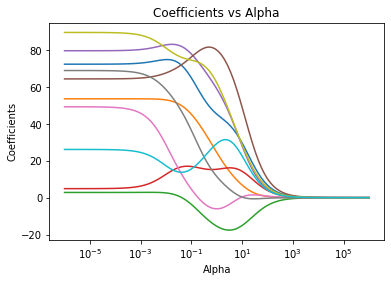

In [47]:
ax = plt.gca()
ax.plot(alphas, coefs_list)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs Alpha')
plt.show()

In [48]:
# As alpha value tends towards the coefficients found by ridge regression stabalizes towards randomly
# shaped vectors (similar to linear regression)

In [49]:
# As alpha becomes large the coefficients becomes too small leading to a simple but biased solution